In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report

import warnings
warnings.filterwarnings("ignore")


Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


In [ ]:
# Load the uploaded CSV
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

# Preview data
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [ ]:
# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    object 
 2   chest_pain_type                302 non-null    object 
 3   resting_blood_pressure         302 non-null    int64  
 4   cholestoral                    302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    object 
 6   rest_ecg                       302 non-null    object 
 7   Max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    object 
 9   oldpeak                        302 non-null    float64
 10  slope                          302 non-null    object 
 11  vessels_colored_by_flourosopy  302 non-null    object 
 12  thalassemia                    302 non-null    object 


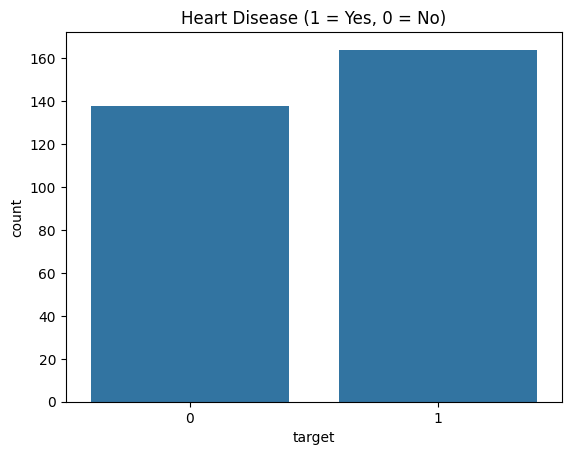

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Heart Disease (1 = Yes, 0 = No)")
plt.show()


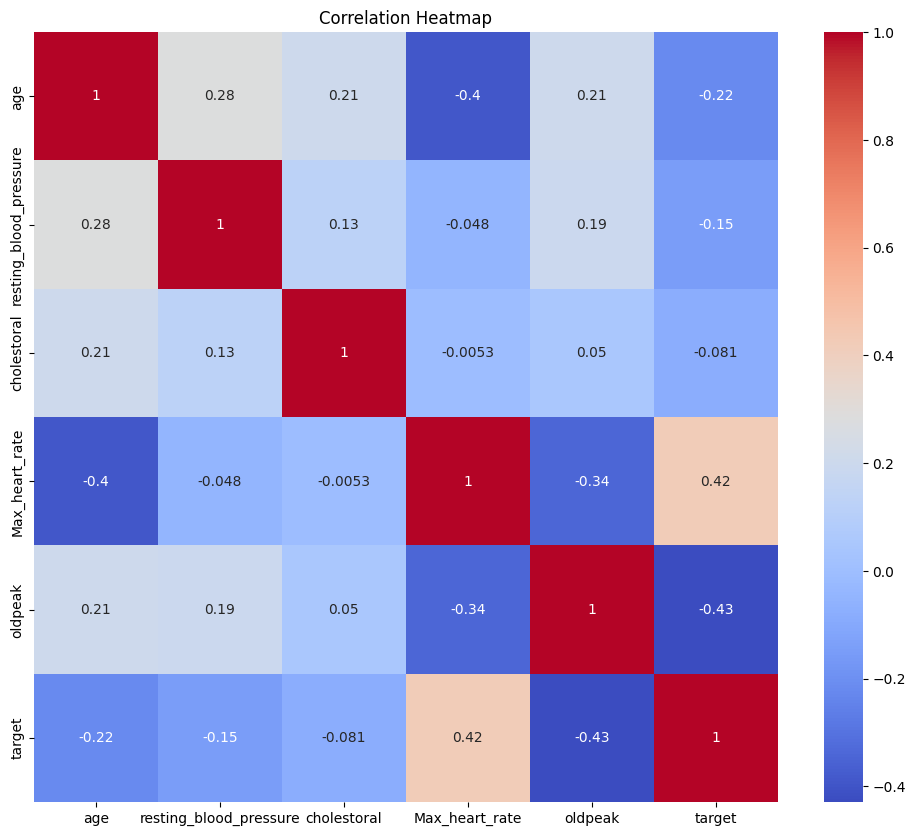

In [ ]:
plt.figure(figsize=(12,10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


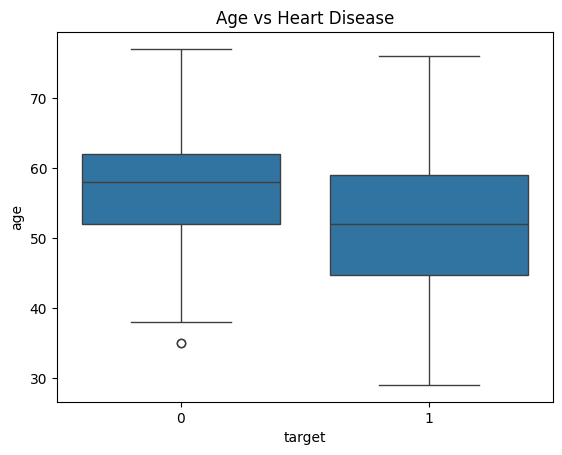

In [ ]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()


In [ ]:
df.dtypes


,0
age,int64
sex,object
chest_pain_type,object
resting_blood_pressure,int64
cholestoral,int64
fasting_blood_sugar,object
rest_ecg,object
Max_heart_rate,int64
exercise_induced_angina,object
oldpeak,float64


In [ ]:
# Split data
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Decision Tree Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.73      0.76      0.75        29

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



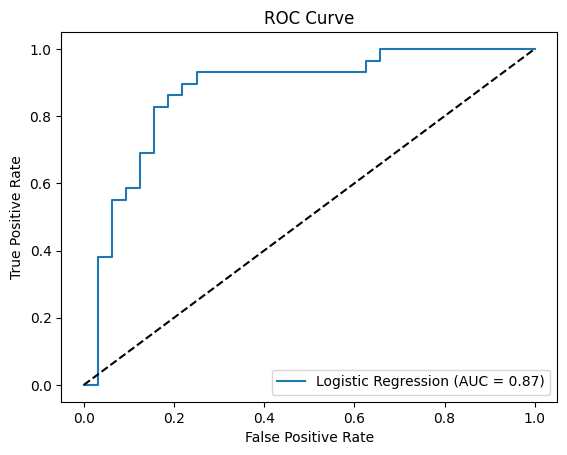

In [ ]:
y_probs_log = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_log)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


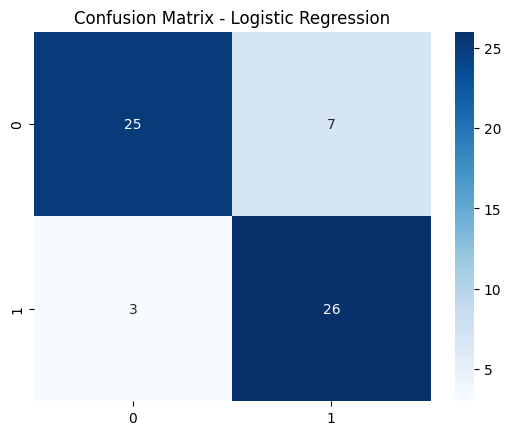

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


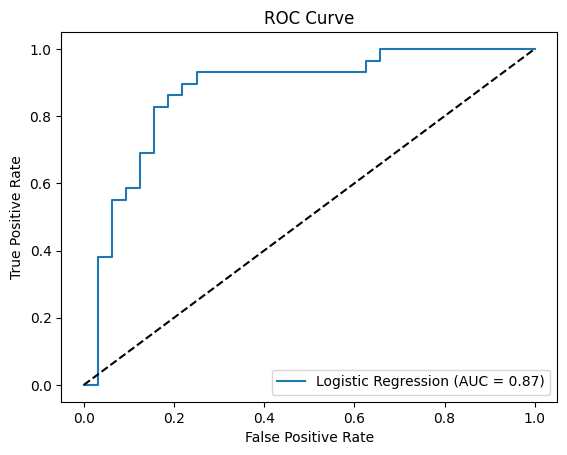

In [ ]:
y_probs_log = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_log)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


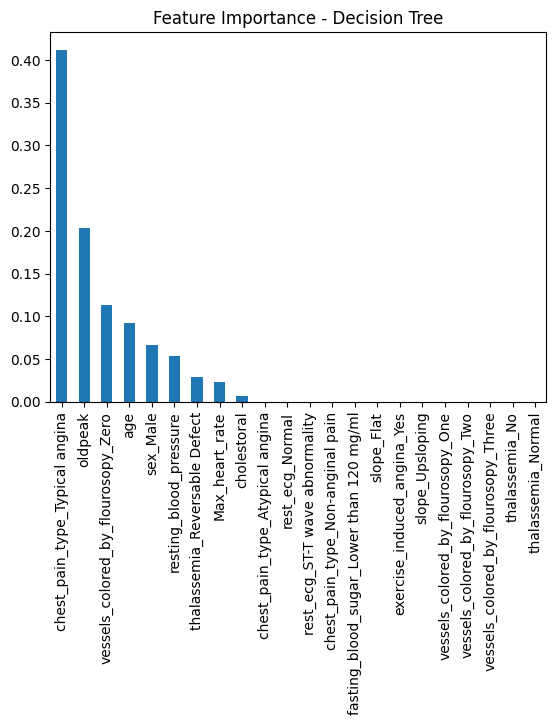

In [ ]:
feature_importance_tree = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_tree.plot(kind='bar', title="Feature Importance - Decision Tree")
plt.show()
